<a href="https://colab.research.google.com/github/Davioliveira1305/Simulacao-Estocastica/blob/main/Lista1_Simula%C3%A7%C3%A3o_Estoc%C3%A1stica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lista 1

##1ª Questão Letra A:

In [78]:
# Retirado do github do professor
# XORSHIFT
def xorshift128():
    '''xorshift
    https://en.wikipedia.org/wiki/Xorshift
    '''
    x = 123456789
    y = 362436069
    z = 521288629
    w = 88675123
    def _random():
        nonlocal x, y, z, w
        t = x ^ ((x << 11) & 0xFFFFFFFF)  # 32bit
        x, y, z = y, z, w
        w = (w ^ (w >> 19)) ^ (t ^ (t >> 8))
        return w

    return _random



In [79]:
# Retirado do github do professor
#LCG
def lcg():

    r = 88675123
    a = 1140671485
    c = 128201163
    m = 2**24

    def _random():
        nonlocal a, c, m, r
        r = (a*r + c) % m
        return r

    return _random

In [80]:
# Retirado github do professor
# coefficients for MT19937
(w, n, m, r) = (32, 624, 397, 31)
a = 0x9908B0DF
(u, d) = (11, 0xFFFFFFFF)
(s, b) = (7, 0x9D2C5680)
(t, c) = (15, 0xEFC60000)
l = 18
f = 1812433253


# make a arry to store the state of the generator
MT = [0 for i in range(n)]
index = n+1
lower_mask = 0x7FFFFFFF #(1 << r) - 1 // That is, the binary number of r 1's
upper_mask = 0x80000000 #lowest w bits of (not lower_mask)


# initialize the generator from a seed
def mt_seed(seed):
    # global index
    # index = n
    MT[0] = seed
    for i in range(1, n):
        temp = f * (MT[i-1] ^ (MT[i-1] >> (w-2))) + i
        MT[i] = temp & 0xffffffff


# Extract a tempered value based on MT[index]
# calling twist() every n numbers
def extract_number():
    global index
    if index >= n:
        twist()
        index = 0

    y = MT[index]
    y = y ^ ((y >> u) & d)
    y = y ^ ((y << s) & b)
    y = y ^ ((y << t) & c)
    y = y ^ (y >> l)

    index += 1
    return y & 0xffffffff


# Generate the next n values from the series x_i
def twist():
    for i in range(0, n):
        x = (MT[i] & upper_mask) + (MT[(i+1) % n] & lower_mask)
        xA = x >> 1
        if (x % 2) != 0:
            xA = xA ^ a
        MT[i] = MT[(i + m) % n] ^ xA


In [81]:
# Números gerados pelo xorshift
r = xorshift128()
xf = []
for i in range(1000):
    xf.append(r())
    ##print(r())

In [82]:
# Números gerados pelo LCG
r = lcg()
lcg = []
for i in range(1000):
  lcg.append(r())
  ##print(r())

In [83]:
# Números gerados pelo mersenne twister
mt_seed(88675123)
mt = []
for i in range(1000):
    mt.append(extract_number())
    ##print(extract_number())

##1ª Questão Letra B:

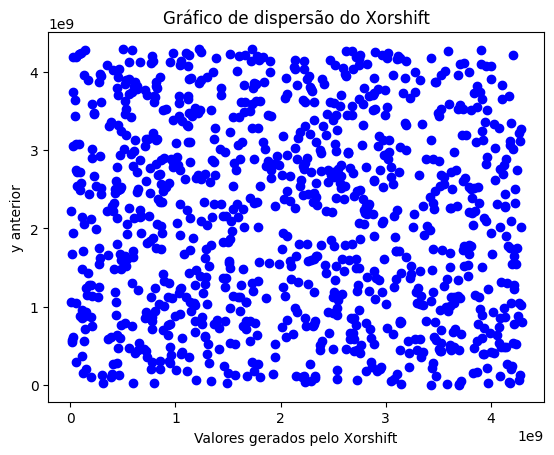

In [84]:
import matplotlib.pyplot as plt

# Xorshift
y_xf = []
y_xf.append(0)
for i in range(1, len(xf)):
  y_xf.append(xf[i - 1])
fig, aux = plt.subplots()
aux.scatter(xf, y_xf, color = 'b')
plt.ylabel('y anterior')
plt.xlabel('Valores gerados pelo Xorshift')
plt.title('Gráfico de dispersão do Xorshift')
plt.show()

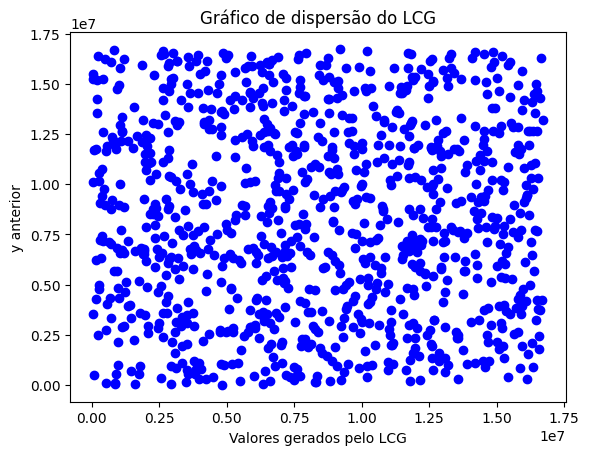

In [85]:
# LCG
y_lcg = []
y_lcg.append(0)
for i in range(1, len(lcg)):
  y_lcg.append(lcg[i - 1])
fig, aux = plt.subplots()
aux.scatter(lcg, y_lcg, color = 'b')
plt.ylabel('y anterior')
plt.xlabel('Valores gerados pelo LCG')
plt.title('Gráfico de dispersão do LCG')
plt.show()

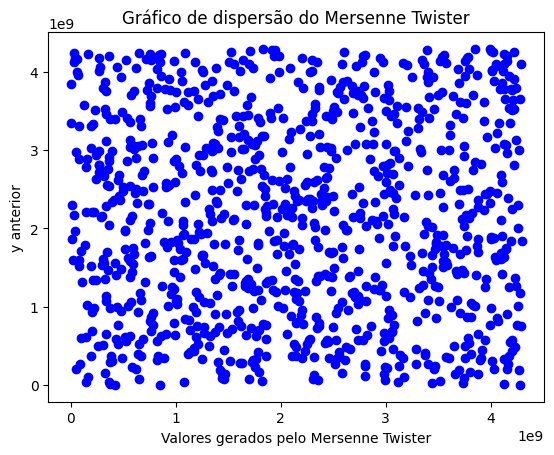

In [86]:
y_mt = []
y_mt.append(0)
for i in range(1, len(mt)):
  y_mt.append(mt[i - 1])
fig, aux = plt.subplots()
aux.scatter(mt, y_mt, color = 'b')
plt.ylabel('y anterior')
plt.xlabel('Valores gerados pelo Mersenne Twister')
plt.title('Gráfico de dispersão do Mersenne Twister')
plt.show()

##2ª Questão Letra A:

In [87]:
def lcg_mod():

    r = 88675123
    a = 1140671485
    c = 128201163
    m = 2**8

    def _random():
        nonlocal a, c, m, r
        r = (a*r + c) % m
        return r

    return _random

In [88]:
r = lcg_mod()
for i in range(5):
  print(r())

50
53
44
71
246


##2ª Questão Letra B:

In [89]:
vetor_50 = []
vetor_100 = []
vetor_200 = []
vetor_300 = []
r = lcg_mod()
for i in range(50):
  vetor_50.append(r())
for i in range(100):
  vetor_100.append(r())
for i in range(200):
  vetor_200.append(r())
for i in range(300):
  vetor_300.append(r())


**Período para as gerações**

In [90]:
def calcula_periodo(lista):
  for i, num in enumerate(lista):
    for k in range(i + 1, len(lista)):
      if lista[k] == num:
        return k - i - 1
  return 0
per_vetor_50 = calcula_periodo(vetor_50)
per_vetor_100 = calcula_periodo(vetor_100)
per_vetor_200 = calcula_periodo(vetor_200)
per_vetor_300 = calcula_periodo(vetor_300)
print(f'Período para a geração com 50 valores = {per_vetor_50}')
print(f'Período para a geração com 100 valores = {per_vetor_100}')
print(f'Período para a geração com 200 valores = {per_vetor_200}')
print(f'Período para a geração com 300 valores = {per_vetor_300}')

Período para a geração com 50 valores = 0
Período para a geração com 100 valores = 0
Período para a geração com 200 valores = 0
Período para a geração com 300 valores = 255


**Variância das gerações.**

In [91]:
def calcular_variancia(lista):
    # Passo 1: Calcular a média
    media = sum(lista) / len(lista)
    # Passo 2 e 3: Calcular as diferenças ao quadrado
    diferencas_quadradas = [(x - media) ** 2 for x in lista]
    # Passo 4: Calcular a média das diferenças ao quadrado
    variancia = sum(diferencas_quadradas) / len(lista)
    return variancia
var_vetor_50 = calcular_variancia(vetor_50)
var_vetor_100 = calcular_variancia(vetor_100)
var_vetor_200 = calcular_variancia(vetor_200)
var_vetor_300 = calcular_variancia(vetor_300)
print(f'Variância para a geração com 50 valores = {var_vetor_50}')
print(f'Variância para a geração com 100 valores = {var_vetor_100}')
print(f'Variância para a geração com 200 valores = {var_vetor_200}')
print(f'Variância para a geração com 300 valores = {var_vetor_300}')

Variância para a geração com 50 valores = 5762.147600000001
Variância para a geração com 100 valores = 4832.187600000001
Variância para a geração com 200 valores = 5477.1284000000005
Variância para a geração com 300 valores = 5465.622622222223


**Amplitude das gerações.**

In [92]:
def calcular_amplitude(lista):
  return max(lista) - min(lista)
print(f'Amplitude da geração com 50 valores = {calcular_amplitude(vetor_50)}')
print(f'Amplitude da geração com 100 valores = {calcular_amplitude(vetor_100)}')
print(f'Amplitude da geração com 200 valores = {calcular_amplitude(vetor_200)}')
print(f'Amplitude da geração com 300 valores = {calcular_amplitude(vetor_300)}')

Amplitude da geração com 50 valores = 252
Amplitude da geração com 100 valores = 247
Amplitude da geração com 200 valores = 255
Amplitude da geração com 300 valores = 255


##2ª Questão Letra C:

In [93]:
def calcular_distancia(lista):
  dist = [0 for _ in range(len(lista))]
  dist[0] = lista[0]
  for i in range(1, len(lista)):
    dist[i] = abs(lista[i] - lista[i - 1])
  return dist
dist_50 = calcular_distancia(vetor_50)
dist_100 = calcular_distancia(vetor_100)
dist_200 = calcular_distancia(vetor_200)
dist_300 = calcular_distancia(vetor_300)

**Período das distâncias geradas**

In [94]:
print(f'Período das distâncias da geração com 50 valores = {calcula_periodo(dist_50)}')
print(f'Período das distâncias da geração com 100 valores = {calcula_periodo(dist_100)}')
print(f'Período das distâncias da geração com 200 valores = {calcula_periodo(dist_200)}')
print(f'Perído das distâncias da geração com 300 valores = {calcula_periodo(dist_300)}')

Período das distâncias da geração com 50 valores = 0
Período das distâncias da geração com 100 valores = 63
Período das distâncias da geração com 200 valores = 127
Perído das distâncias da geração com 300 valores = 255


**Variância das distâncias geradas.**

In [95]:
print(f'Variância das distâncias da geração com 50 valores = {calcular_variancia(dist_50)}')
print(f'Variância das distâncias da geração com 100 valores = {calcular_variancia(dist_100)}')
print(f'Variância das distâncias da geração com 200 valores = {calcular_variancia(dist_200)}')
print(f'Variância das distâncias da geração com 300 valores = {calcular_variancia(dist_300)}')

Variância das distâncias da geração com 50 valores = 3644.3235999999997
Variância das distâncias da geração com 100 valores = 3569.913099999999
Variância das distâncias da geração com 200 valores = 3720.109774999999
Variância das distâncias da geração com 300 valores = 3795.084655555555


**Amplitude das distâncias geradas**

In [96]:
print(f'Amplitude das distâncias da geração com 50 valores = {calcular_amplitude(dist_50)}')
print(f'Amplitude das distâncias da geração com 100 valores = {calcular_amplitude(dist_100)}')
print(f'Amplitude das distâncias da geração com 200 valores = {calcular_amplitude(dist_200)}')
print(f'Amplitude das distâncias da geração com 300 valores = {calcular_amplitude(dist_300)}')

Amplitude das distâncias da geração com 50 valores = 214
Amplitude das distâncias da geração com 100 valores = 236
Amplitude das distâncias da geração com 200 valores = 236
Amplitude das distâncias da geração com 300 valores = 236


##2ª Questão letra D:

In [97]:
import random
vetor_50_random = []
vetor_100_random = []
vetor_200_random = []
vetor_300_random = []
for _ in range(50):
  vetor_50_random.append(random.randrange(256))
for _ in range(100):
  vetor_100_random.append(random.randrange(256))
for _ in range(200):
  vetor_200_random.append(random.randrange(256))
for _ in range(300):
  vetor_300_random.append(random.randrange(256))

**Comparação do período entre o gerador proposto e o gerador da linguagem**

In [98]:
print(f'Para 50 valores: Período do nosso gerador = {per_vetor_50} vs Período do gerador do python = {calcula_periodo(vetor_50_random)}')
print(f'Para 100 valores: Período do nosso gerador = {per_vetor_100} vs Período do gerador do python = {calcula_periodo(vetor_100_random)}')
print(f'Para 200 valores: Período do nosso gerador = {per_vetor_200} vs Período do gerador do python = {calcula_periodo(vetor_200_random)}')
print(f'Para 300 valores: Período do nosso gerador = {per_vetor_300} vs Período do gerador do python = {calcula_periodo(vetor_300_random)}')

Para 50 valores: Período do nosso gerador = 0 vs Período do gerador do python = 37
Para 100 valores: Período do nosso gerador = 0 vs Período do gerador do python = 12
Para 200 valores: Período do nosso gerador = 0 vs Período do gerador do python = 140
Para 300 valores: Período do nosso gerador = 255 vs Período do gerador do python = 45


**Comparação da variância entre o gerador proposto e o gerador da linguagem**

In [99]:
print(f'Para 50 valores: Variância do nosso gerador = {var_vetor_50} vs Variância do gerador do python = {calcular_variancia(vetor_50_random)}')
print(f'Para 100 valores: Variância do nosso gerador = {var_vetor_100} vs Variância do gerador do python = {calcular_variancia(vetor_100_random)}')
print(f'Para 200 valores: Variância do nosso gerador = {var_vetor_200} vs Variância do gerador do python = {calcular_variancia(vetor_200_random)}')
print(f'Para 300 valores: Variância do nosso gerador = {var_vetor_300} vs Variância do gerador do python = {calcular_variancia(vetor_300_random)}')

Para 50 valores: Variância do nosso gerador = 5762.147600000001 vs Variância do gerador do python = 4106.6084
Para 100 valores: Variância do nosso gerador = 4832.187600000001 vs Variância do gerador do python = 4705.029599999998
Para 200 valores: Variância do nosso gerador = 5477.1284000000005 vs Variância do gerador do python = 5571.953775000003
Para 300 valores: Variância do nosso gerador = 5465.622622222223 vs Variância do gerador do python = 5290.448655555556


**Comparação da amplitude entre o gerador proposto e o gerador da linguagem**

In [100]:
print(f'Para 50 valores: Amplitude do nosso gerador = {calcular_amplitude(vetor_50)} vs Amplitude do gerador do python = {calcular_amplitude(vetor_50_random)}')
print(f'Para 100 valores: Amplitude do nosso gerador = {calcular_amplitude(vetor_100)} vs Amplitude do gerador do python = {calcular_amplitude(vetor_100_random)}')
print(f'Para 200 valores: Amplitude do nosso gerador = {calcular_amplitude(vetor_200)} vs Amplitude do gerador do python = {calcular_amplitude(vetor_200_random)}')
print(f'Para 300 valores: Amplitude do nosso gerador = {calcular_amplitude(vetor_300)} vs Amplitude do gerador do python = {calcular_amplitude(vetor_300_random)}')

Para 50 valores: Amplitude do nosso gerador = 252 vs Amplitude do gerador do python = 235
Para 100 valores: Amplitude do nosso gerador = 247 vs Amplitude do gerador do python = 247
Para 200 valores: Amplitude do nosso gerador = 255 vs Amplitude do gerador do python = 254
Para 300 valores: Amplitude do nosso gerador = 255 vs Amplitude do gerador do python = 255


**Distância entre os valores gerados na linguagem python**

In [101]:
dist_random_50 = calcular_distancia(vetor_50_random)
dist_random_100 = calcular_distancia(vetor_100_random)
dist_random_200 = calcular_distancia(vetor_200_random)
dist_random_300 = calcular_distancia(vetor_300_random)

**Comparação da Variância das distâncias do nosso gerador e o gerador do python**

In [102]:
print(f'Para 50 valores: Variância das distâncias do nosso gerador = {calcular_variancia(dist_50)} vs Variância das distâncias do python = {calcular_variancia(dist_random_50)}')
print(f'Para 100 valores: Variância das distâncias do nosso gerador = {calcular_variancia(dist_100)} vs Variância das distâncias do python = {calcular_variancia(dist_random_100)}')
print(f'Para 200 valores: Variância das distâncias do nosso gerador = {calcular_variancia(dist_200)} vs Variância das distâncias do python = {calcular_variancia(dist_random_200)}')
print(f'Para 300 valores: Variância das distâncias do nosso gerador = {calcular_variancia(dist_300)} vs Variância das distâncias do python = {calcular_variancia(dist_random_300)}')

Para 50 valores: Variância das distâncias do nosso gerador = 3644.3235999999997 vs Variância das distâncias do python = 2804.3315999999995
Para 100 valores: Variância das distâncias do nosso gerador = 3569.913099999999 vs Variância das distâncias do python = 3389.7504
Para 200 valores: Variância das distâncias do nosso gerador = 3720.109774999999 vs Variância das distâncias do python = 4139.5951000000005
Para 300 valores: Variância das distâncias do nosso gerador = 3795.084655555555 vs Variância das distâncias do python = 3899.1075


**Comparação da Amplitude das distâncias do nosso e do gerador do python**

In [103]:
print(f'Para 50 valores: Amplitude das distâncias do nosso gerador = {calcular_amplitude(dist_50)} vs Amplitude das distâncias do gerador python = {calcular_amplitude(dist_random_50)}')
print(f'Para 100 valores: Amplitude das distâncias do nosso gerador = {calcular_amplitude(dist_100)} vs Amplitude das distâncias do gerador python = {calcular_amplitude(dist_random_100)}')
print(f'Para 200 valores: Amplitude das distâncias do nosso gerador = {calcular_amplitude(dist_200)} vs Amplitude das distâncias do gerador python = {calcular_amplitude(dist_random_200)}')
print(f'Para 300 valores: Amplitude das distâncias do nosso gerador = {calcular_amplitude(dist_300)} vs Amplitude das distâncias do gerador python = {calcular_amplitude(dist_random_300)}')

Para 50 valores: Amplitude das distâncias do nosso gerador = 214 vs Amplitude das distâncias do gerador python = 202
Para 100 valores: Amplitude das distâncias do nosso gerador = 236 vs Amplitude das distâncias do gerador python = 224
Para 200 valores: Amplitude das distâncias do nosso gerador = 236 vs Amplitude das distâncias do gerador python = 247
Para 300 valores: Amplitude das distâncias do nosso gerador = 236 vs Amplitude das distâncias do gerador python = 246


## Questão 3

In [104]:
import random
import math
# Geração de variáveis geométricas
def gerar_variavel_geometrica(p):
    if p <= 0 or p >= 1:
        return ("A probabilidade de sucesso (p) deve estar no intervalo (0, 1).")
    U = random.random()
    X = math.floor(math.log(U) / math.log(1 - p)) + 1
    return X

probabilidade_sucesso = 0.6
variavel_geometrica = gerar_variavel_geometrica(probabilidade_sucesso)
print(f"Variável Geométrica gerada com p={probabilidade_sucesso}: x = {variavel_geometrica}")


Variável Geométrica gerada com p=0.6: x = 1


In [159]:
# Gerando variáveis binomiais partindo de variáveis geométricas
def gerar_variavel_binom(n, p):
  binom = 0
  i = 0
  while n >= 0:
    geo = gerar_variavel_geometrica(p)
    if geo > n:
      binom = binom + 0
    else:
      binom = binom + 1
    n = n - geo
    i = i + 1
  return binom, i

probabilidade = 0.8
n = 5
binom, i = gerar_variavel_binom(n, probabilidade)
print(f'Variável binomial gerada com p = {probabilidade}, n = {n}, x = {binom}, QTD de valores aleatórios para a geração = {i}')

Variável binomial gerada com p = 0.8, n = 5, x = 3, QTD de valores aleatórios para a geração = 4


In [160]:
vetor_n = [6,13,17,7,8,5,10]
vetor_p = [0.6, 0.22, 0.67, 0.1, 0.8, 0.15, 0.7]
for i in range(0, len(vetor_p)):
  probabilidade = vetor_p[i]
  n = vetor_n[i]
  binom, k = gerar_variavel_binom(n, probabilidade)
  print(f'Variável binomial gerada com p = {probabilidade}, n = {n}, x = {binom}, QTD de valores aleatórios para a geração = {k}')


Variável binomial gerada com p = 0.6, n = 6, x = 1, QTD de valores aleatórios para a geração = 2
Variável binomial gerada com p = 0.22, n = 13, x = 2, QTD de valores aleatórios para a geração = 3
Variável binomial gerada com p = 0.67, n = 17, x = 13, QTD de valores aleatórios para a geração = 14
Variável binomial gerada com p = 0.1, n = 7, x = 0, QTD de valores aleatórios para a geração = 1
Variável binomial gerada com p = 0.8, n = 8, x = 6, QTD de valores aleatórios para a geração = 7
Variável binomial gerada com p = 0.15, n = 5, x = 1, QTD de valores aleatórios para a geração = 2
Variável binomial gerada com p = 0.7, n = 10, x = 7, QTD de valores aleatórios para a geração = 8


##4º Questão

In [161]:
import numpy as np

def gerar_variaveis_multinomiais(n, p, num_categorias):
    resultados_binomiais = np.random.binomial(n, p, num_categorias)
    soma_resultados = np.sum(resultados_binomiais)
    variaveis_multinomiais = resultados_binomiais / soma_resultados
    return variaveis_multinomiais

# Exemplo de uso
n = 10  # Número total de tentativas
p = 0.5  # Probabilidade de sucesso em cada tentativa
num_categorias = 3  # Número de categorias

variaveis_multinomiais = gerar_variaveis_multinomiais(n, p, num_categorias)
print(f"Variáveis Multinomiais geradas: {variaveis_multinomiais}")


Variáveis Multinomiais geradas: [0.2 0.4 0.4]


## Questão 5

**Fixando $\lambda$=1, temos a seguinte função acumulada: $$F(x) = \frac{tan^{-1}(x)}{\pi}+\frac{1}{2}$$ Igualando a função acumulada a u temos $$ \frac{tan^{-1}(x)}{\pi}+\frac{1}{2} = u$$, então $$x = tan(\pi(u - 0.5)$$ para alpha = 1 a distribuição de cauchy ainda possui caudas muito longas, o que pode levar a valores discrepantes.**

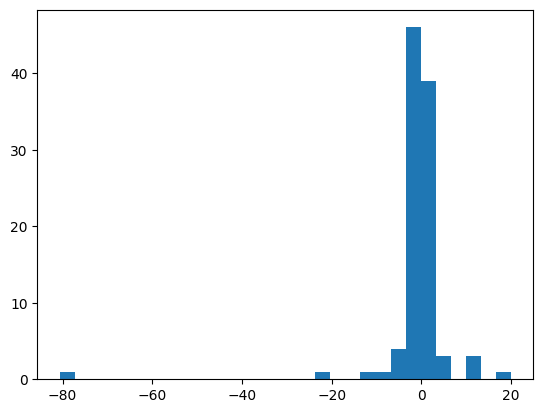

In [107]:
import math
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
rd.seed(1010)
alpha = 1
N = 100
u = rd.uniform(0,1,N)
vetor_x = []
for i in u:
  y = math.pi * (i - 0.5)
  x = math.tan(y)
  vetor_x.append(x)
plt.hist(vetor_x, bins = 30)
plt.show()